In this file we create the heatmaps with dendrogram

In [8]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.metrics import pairwise
import os
os.chdir(r'C:\Users\DELL XPS\Desktop\reddit_music')

# plt.style.use(['science', 'no-latex'])
plt.rcParams['font.family'] = 'arial'

df = pd.read_csv("data\\Reddit_Sub_Com_f_genre.csv")
gen_names = pd.read_csv("data\\genre_names_f.csv")
gen_names['short'] = gen_names['short'].fillna(gen_names['genre'])
df = pd.merge(df,gen_names,on='label')
df = df.drop_duplicates(subset=['id'])

### Artists 


In [8]:

NUMBER_ARTISTS = 30
figsize = (13,13)
method = 'average'
category= 'artist'



In [9]:


# getting the data to make plot for the artists 

cosine = pd.read_csv("data\\artist_cosine_similarity.csv")
cosine.index = cosine['artist']
cosine.drop('artist',axis=1,inplace=True)
art_cosine = [k.replace('$','S') for k in cosine.index]
cosine.columns = art_cosine
cosine.index = art_cosine

In [10]:

# this defines the artists we will be including in our heatmap 
counts= pd.read_csv("data\\artist_counts.csv")
counts.columns = ['index','artist','counts']
artists = counts.sort_values(by='counts', ascending=False)['artist'].head(NUMBER_ARTISTS).values
artists=[k.replace('$','S') for k in artists]


# if we want to use the custom dataset with artist names
# artists = artist_set['artist'].values

cosine = cosine[cosine.index.isin(artists)]
cosine = cosine[artists]
cosine = cosine.T[artists]

cosine=cosine[cosine.index.isin(artists)][artists].T[artists]

In [27]:
### get the release_date info
release_date = pd.read_csv(r"C:\Users\DELL XPS\Desktop\CSS_Research\\SummerResearch\old_visuals_and_data\Artist_Release_Date.csv")
release_date['name'] = release_date['name'].apply(lambda x: x.replace('$','S'))


date = release_date[release_date['name'].isin(artists)]
date.reset_index(inplace=True,drop=True)
date.index=date['name']
date = date.T[artists]
date = date.T
date['release_date']=pd.to_datetime(date['release_date'])
date['release_date_y'] = date['release_date'].dt.year
date=date.sort_values(by='release_date_y')


# defines the colormap. 

ran = date['release_date_y'].max() - date['release_date_y'].min() + 1

years_list = list(np.arange(date['release_date_y'].min(),date['release_date_y'].max() + 1))

palette = sns.color_palette("Blues", ran)

date['palette'] = date['release_date_y'].apply(lambda x: palette[years_list.index(x)])

temp = date[['release_date_y','palette']]
temp.index = temp['release_date_y']
temp = temp.drop('release_date_y',axis=1)
lut = temp.to_dict()['palette']


row_colors = pd.DataFrame(date['release_date_y'])['release_date_y'].map(lut)
row_colors.name = "Era"

cosine.index = ['RHCP' if k == 'Red Hot Chili Peppers' else "\"Weird Al\"" if k =='"Weird Al" Yankovic' else k[0:21] for k in cosine.index]
cosine.columns = ['RHCP' if k == 'Red Hot Chili Peppers' else "\"Weird Al\"" if k =='"Weird Al" Yankovic' else k[0:21] for k in cosine.index]


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

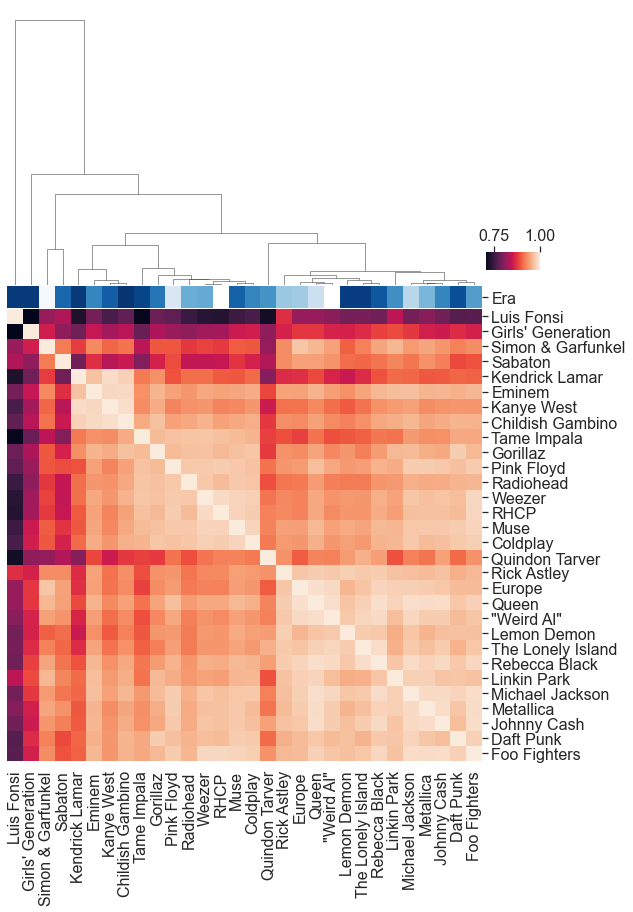

In [28]:
def create_heatmap(df, method, figsize, row_colors=None):
    '''df should be in the form of a cosine similarity matrix'''
    # fig, (ax1,ax2) = plt.subplots(2)

    im = sns.clustermap(df,
                        method=method,
                        metric='cosine',
                        yticklabels=True, 
                        xticklabels=True, 
                        figsize=figsize, 
                        col_colors=row_colors,
#                         cbar_pos = (.844,.831,.058,.019),
                        cbar_pos = (.83,.698,.058,.019),
                        cbar_kws={"orientation": "horizontal"},
                        dendrogram_ratio= 0.37)
    sns.set(font_scale=1.45)    
    # plt.tight_layout()
    return im 


im =create_heatmap(cosine, method, figsize, row_colors)
im.ax_row_dendrogram.set_visible(False)
im.cax.yaxis.set_ticks_position("right")
im.cax.xaxis.set_ticks_position("top")

ax = im.ax_heatmap
ax.set_ylabel("")
# plt.subplots_adjust(bottom=0.28, right = 0.79)

plt.savefig('visuals\\heatmap-{}-similarity-{}_large.pdf'.format(category, NUMBER_ARTISTS), dpi = 300, bbox_inches = 'tight')
plt.show()


### Genres

In [9]:
figsize = (15,15)
method = 'average'
category= 'genre'
top_x = 50

# use long or short names
# genre = 'short'
genre = 'genre'



# getting the data to make plot for the genres 

cosine = pd.read_csv(r"data\{}_cosine_similarity.csv".format(genre))

cosine.index = cosine[genre]
cosine.drop(genre,axis=1,inplace=True)

# plot the top x genres
genres = df.groupby(genre)[genre].count().sort_values(ascending=False).head(top_x).index
cosine = cosine[cosine.index.isin(genres)][genres]

cols = cosine.columns 
cosine = cosine.T[cols]


In [10]:

### get the release_date info
release_date = pd.read_csv(r"data\{}_release_dates_s.csv".format(genre))
release_date.columns = ['unnamed: 0','genre','mean_release_time']



release_date.dropna(inplace=True)

release_date = pd.merge(release_date, gen_names[['genre','short']], on ='genre')

# release_date['genre'] = release_date['short']
release_date.index=release_date['genre']
release_date['mean_release_time']=pd.to_datetime(release_date['mean_release_time'])
release_date['release_date_y'] = release_date['mean_release_time'].dt.year

release_date = release_date.sort_values(by='release_date_y')


# defines the colormap. 

ran = release_date['release_date_y'].max() - release_date['release_date_y'].min() + 1

years_list = list(np.arange(release_date['release_date_y'].min(),release_date['release_date_y'].max() + 1))

palette = sns.color_palette("Blues", ran)

release_date['palette'] = release_date['release_date_y'].apply(lambda x: palette[years_list.index(x)])

temp = release_date[['release_date_y','palette']]
temp.index = temp['release_date_y']
temp = temp.drop('release_date_y',axis=1)
lut = temp.to_dict()['palette']
# lut = dict(zip(set(release_date['release_date_y']), sns.color_palette("Blues", len(set(release_date['release_date_y'])))))
# lut = dict(zip(set(release_date['release_date_y']), sns.color_palette("Blues", ran)))

row_colors = pd.DataFrame(release_date['release_date_y'])['release_date_y'].map(lut)


row_colors.name = 'Era'

rc = row_colors[row_colors.index.isin(cosine.index)]

[k for k in cosine.index if k not in row_colors.index]



[]

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

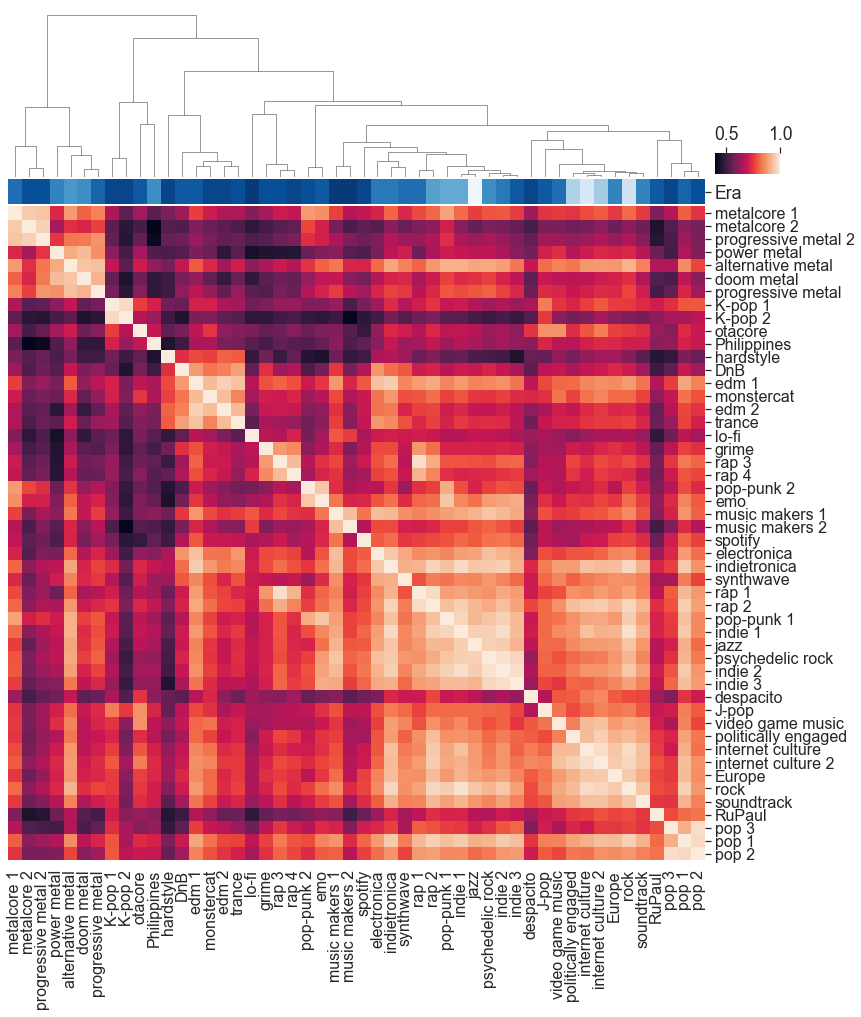

In [17]:
from matplotlib.collections import LineCollection

def create_heatmap(df, method, figsize, row_colors=None):
    '''df should be in the form of a cosine similarity matrix'''
    labels = df.index
    im = sns.clustermap(df,method=method,
                        yticklabels=True, xticklabels=True,
                        figsize=figsize,  
                        col_colors=row_colors,
                        cbar_pos = (.839,.8266,.06,.019),
                        cbar_kws={"orientation": "horizontal"}, 
                        metric = 'cosine')
#     im = sns.clustermap(df,method='average',yticklabels=True, xticklabels=True, figsize=figsize,  col_colors=row_colors,cbar_pos = (.91,.815,.019,.09),metric='cosine')
#     sns.set(font_scale=1.6)    
    # plt.tight_layout()
    return im 


im =create_heatmap(cosine, method, figsize, row_colors)
im.ax_row_dendrogram.set_visible(False)
im.cax.yaxis.set_ticks_position("right")
im.cax.xaxis.set_ticks_position("top")

im.ax_heatmap.set_xticklabels(im.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
im.ax_heatmap.set_yticklabels(im.ax_heatmap.get_ymajorticklabels(), fontsize = 16)

ax = im.ax_heatmap
ax.set_xlabel('')




# plt.show()

# plt.subplots_adjust(bottom=0.28, right = 0.86)
plt.savefig('visuals\\heatmap-{}-{}-similarity_large.pdf'.format(genre, top_x), dpi = 300, bbox_inches = 'tight')
plt.show()

In [66]:
df[df['artist']=='The Pointer Sisters'].apply(lambda x: 'www.reddit.com/r/{}/comments/{}/text/{}'.format(x['subreddit'],str(x['link_id'])[3:], str(x['id'])[3:]), axis=1).values

array(['www.reddit.com/r/teenagers/comments/2asndd/text/ciycwr9',
       'www.reddit.com/r/neoliberal/comments/81dpn2/text/dv38rrb',
       'www.reddit.com/r/Music/comments/2dn933/text/cjrihcp',
       'www.reddit.com/r/Music/comments/4lnm0m/text/d3ospyv',
       'www.reddit.com/r/funny/comments/2cun4h/text/cjjjarh',
       'www.reddit.com/r/funny/comments/3kwrjd/text/cv1ek30',
       'www.reddit.com/r/pics/comments/4uqndf/text/d5sc20f',
       'www.reddit.com/r/CasualConversation/comments/4d46hk/text/d1nmj1j',
       'www.reddit.com/r/CasualConversation/comments/2ubfd0/text/co6vwfv',
       'www.reddit.com/r/gaming/comments/7pocsu/text/dsipkuq',
       'www.reddit.com/r/politics/comments/4uu9ac/text/d5suqeg',
       'www.reddit.com/r/AskReddit/comments/6j4eru/text/djbhm57',
       'www.reddit.com/r/AskReddit/comments/2yhpsq/text/cp9s33d',
       'www.reddit.com/r/AskReddit/comments/5e0b9p/text/da90sti',
       'www.reddit.com/r/AskReddit/comments/6rdf2o/text/dl48ejr',
       'www.redd